# Exploratory Data Analysis

In [1]:
import pandas as pd 
import numpy as np 

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
nltk.download('punkt')
stop_words = set(stopwords.words('english')) 

from wordcloud import WordCloud
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/koalachelsea/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
train_neg = pd.read_csv('data/train_neg.csv', index_col=None, encoding='utf-8')
train_pos = pd.read_csv('data/train_pos.csv', index_col=None, encoding='utf-8')
train = np.concatenate([train_neg, train_pos], axis=0)
train = pd.DataFrame(data=train, columns=["review", "sentiment"])
train

,review,sentiment
0,Working with one of the best Shakespeare sourc...,neg
1,"Well...tremors I, the original started off in ...",neg
2,Ouch! This one was a bit painful to sit throug...,neg
3,"I've seen some crappy movies in my life, but t...",neg
4,"""Carriers"" follows the exploits of two guys an...",neg
...,...,...
24995,About a year ago I finally gave up on American...,pos
24996,When I saw the elaborate DVD box for this and ...,pos
24997,"Last November, I had a chance to see this film...",pos
24998,Great movie -I loved it. Great editing and use...,pos


In [3]:
# tokenize the review
train['token'] = train['review'].apply(word_tokenize)\
.apply(lambda x: [item for item in x if item.isalpha()])

# clean the token by stopword removal and stemming
stop = stopwords.words('english')
porter_stemmer = PorterStemmer()

train['clean token'] = train['token'].apply(lambda x: [item for item in x if item not in stop_words])\
.apply(lambda x: [porter_stemmer.stem(item) for item in x])

In [4]:
train['token count'] = train['token'].apply(len)
train['vocab count'] = train['clean token'].apply(set).apply(len)
train['lexical_diversity'] = train['vocab count']/train['token count']
train

,review,sentiment,token,clean token,token count,vocab count,lexical_diversity
0,Working with one of the best Shakespeare sourc...,neg,"[Working, with, one, of, the, best, Shakespear...","[work, one, best, shakespear, sourc, film, man...",41,21,0.512195
1,"Well...tremors I, the original started off in ...",neg,"[Well, tremors, I, the, original, started, off...","[well, tremor, I, origin, start, found, movi, ...",190,77,0.405263
2,Ouch! This one was a bit painful to sit throug...,neg,"[Ouch, This, one, was, a, bit, painful, to, si...","[ouch, thi, one, bit, pain, sit, It, cute, amu...",123,63,0.512195
3,"I've seen some crappy movies in my life, but t...",neg,"[I, seen, some, crappy, movies, in, my, life, ...","[I, seen, crappi, movi, life, one, must, among...",348,139,0.399425
4,"""Carriers"" follows the exploits of two guys an...",neg,"[Carriers, follows, the, exploits, of, two, gu...","[carrier, follow, exploit, two, guy, two, gal,...",787,321,0.407878
...,...,...,...,...,...,...,...
24995,About a year ago I finally gave up on American...,pos,"[About, a, year, ago, I, finally, gave, up, on...","[about, year, ago, I, final, gave, american, t...",138,63,0.456522
24996,When I saw the elaborate DVD box for this and ...,pos,"[When, I, saw, the, elaborate, DVD, box, for, ...","[when, I, saw, elabor, dvd, box, dread, red, q...",129,71,0.550388
24997,"Last November, I had a chance to see this film...",pos,"[Last, November, I, had, a, chance, to, see, t...","[last, novemb, I, chanc, see, film, reno, film...",202,68,0.336634
24998,Great movie -I loved it. Great editing and use...,pos,"[Great, movie, loved, it, Great, editing, and,...","[great, movi, love, great, edit, use, soundtra...",120,52,0.433333


Text(0.5, 1.0, 'Lexical Diversity of Movie Review')

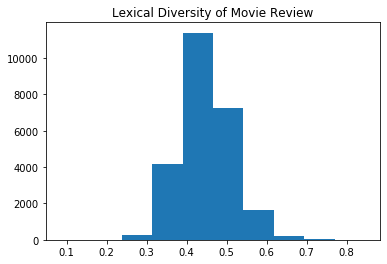

In [5]:
plt.hist(train['lexical_diversity'])
plt.title('Lexical Diversity of Movie Review')

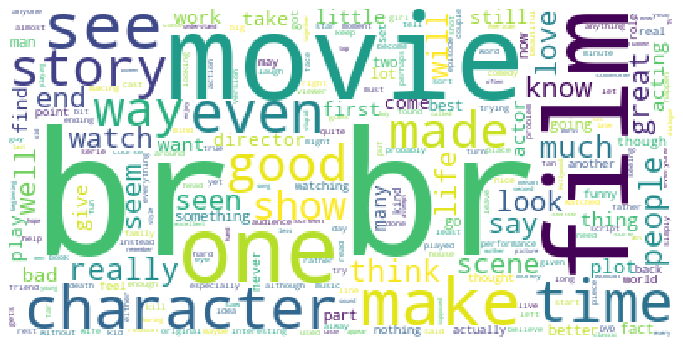

In [6]:
# Join the different processed titles together.
long_string = ','.join(list(train['review'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
fig = plt.figure(1, figsize=(12, 12))
plt.axis('off')

plt.imshow(wordcloud)
plt.show()